## Collatz beta notebook

In [9]:
"""
This notebook analyses the betas of collatz sequences and their relationship
to other components.
"""

# Fix possible import problems
import sys
sys.path.append("..")

# Imports
from math import log2
from fractions import Fraction
import random as rnd
import matplotlib.pyplot as plt
import pandas as pd
from collatz import commons as com
from collatz import generator as gen


# Configuration
k = 3
max_value = 101
max_iterations = 100
start_value = rnd.randint(1, max_value)

if start_value % 2 == 0:
    start_value = start_value + 1

# start_value = 3711

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_rows', 10000)
pd.set_option('display.expand_frame_repr', False)

# Generate Collatz sequence
analysis_frame = gen.generate_odd_collatz_sequence(
    start_value=start_value, k=k, max_iterations=max_iterations)

# Drop last row
analysis_frame = analysis_frame[:-1]

# Derive additional fields
analysis_frame["n"] = analysis_frame.index + 1
analysis_frame.insert(1, "v_1", [start_value] * len(analysis_frame))

# Calculate alpha
analysis_frame["alpha_i"] = analysis_frame["next_collatz"].apply(com.trailing_zeros)
analysis_frame["alpha_i"] = analysis_frame["alpha_i"].astype("int64")
analysis_frame["alpha"] = analysis_frame["alpha_i"].cumsum()
analysis_frame["alpha_max"] = analysis_frame["n"] * log2(k) + log2(start_value)
analysis_frame["alpha_max"] = analysis_frame["alpha_max"].astype('int64') + 1
analysis_frame["alpha_cycle"] = (analysis_frame["n"] * log2(k)).astype('int64') + 1

# Calculate beta
analysis_frame["beta_i"] = 1 + 1/(k*analysis_frame["collatz"])
analysis_frame["beta"] = analysis_frame["beta_i"].cumprod()
analysis_frame["beta_log"] = analysis_frame["beta"].apply(log2)
analysis_frame["beta_log_max"] = analysis_frame["alpha_max"] - \
                             analysis_frame["n"] * log2(k) - log2(start_value)

analysis_frame["beta_log_cycle"] = (analysis_frame["n"] * log2(k)).astype('int64') + 1 - \
                                   analysis_frame["n"] * log2(k)

analysis_frame["beta_max"] = 2**analysis_frame["beta_log_max"]
analysis_frame["beta_cycle"] = 2**analysis_frame["beta_log_cycle"]

analysis_frame["beta_frac"] = analysis_frame["beta"].apply(
    Fraction.from_float).apply(Fraction.limit_denominator)

analysis_frame["beta_max_frac"] = analysis_frame["beta_max"].apply(
    Fraction.from_float).apply(Fraction.limit_denominator)

analysis_frame["beta_cycle_frac"] = analysis_frame["beta_cycle"].apply(
    Fraction.from_float).apply(Fraction.limit_denominator)

analysis_frame["bin_str"] = analysis_frame["collatz"].apply(com.to_binary)

# Print results
print_frame = analysis_frame[[
    "n", "collatz","next_odd",
    "beta", "beta_cycle", "beta_max",
    "alpha", "alpha_cycle", "alpha_max",
    "bin_str"
]]

print_frame.columns = ["n","v_i", "v_i+",
                       "b", "b_cycle", "b_max",
                       "a", "a_cycle", "a_max",
                       "bin_str"
]

final_beta = analysis_frame["beta"][len(analysis_frame)-1]

print("Start value:", start_value, " K:", k, 
      " Final beta:", final_beta, 
      "\n")

print(print_frame.to_string(index=False), "\n")

Start value: 65  K: 3  Final beta: 1.229381074648564 

 n  v_i  v_i+         b   b_cycle     b_max   a  a_cycle  a_max  bin_str
 1   65    49  1.005128  1.333333  1.312821   2        2      8  1000001
 2   49    37  1.011966  1.777778  1.750427   4        4     10   110001
 3   37     7  1.021083  1.185185  1.166952   8        5     11   100101
 4    7    11  1.069706  1.580247  1.555935   9        7     13      111
 5   11    17  1.102121  1.053498  1.037290  10        8     14     1011
 6   17    13  1.123731  1.404664  1.383054  12       10     16    10001
 7   13     5  1.152545  1.872885  1.844072  15       12     18     1101
 8    5     1  1.229381  1.248590  1.229381  19       13     19      101 



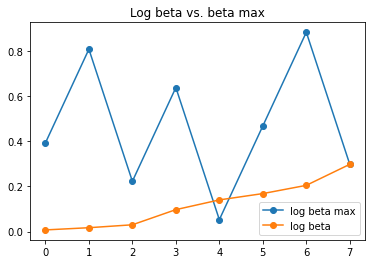

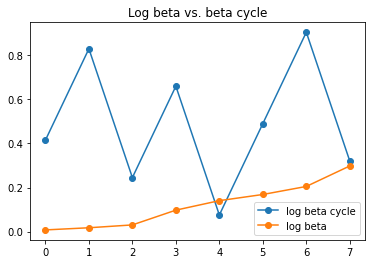

In [10]:
# Plot results
plt.figure()
plt.title("Log beta vs. beta max")
plt.plot(analysis_frame["beta_log_max"], "-o", label="log beta max")
plt.plot(analysis_frame["beta_log"], "-o", label='log beta')
plt.legend()

plt.figure()
plt.title("Log beta vs. beta cycle")
plt.plot(analysis_frame["beta_log_cycle"], "-o", label="log beta cycle")
plt.plot(analysis_frame["beta_log"], "-o", label='log beta')
plt.legend()
plt.show()
